In [529]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [530]:
# Agregar el dataset 'survey_results_public.csv' en el directorio data/
df = pd.read_csv('data/survey_results_public.csv')
# df.dropna(inplace=True)
# PEPE = ["NEWCollabToolsDesireNextYear",
# "NEWCollabToolsWorkedWith",
# "LanguageDesireNextYear",
# "LanguageWorkedWith",
# "MiscTechDesireNextYear",
# "MiscTechWorkedWith",
# "JobFactors",
# "DevType",
# "DatabaseDesireNextYear",
# "DatabaseWorkedWith"]

# df.drop(columns=PEPE, inplace=True)

# df.to_csv('pepito.csv', index=False)

In [531]:
df['EdLevel'].value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          26542
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       13112
Some college/university study without earning a degree                                 7239
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     4771
Associate degree (A.A., A.S., etc.)                                                    1843
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1690
Primary/elementary school                                                               941
Professional degree (JD, MD, etc.)                                                      800
I never completed any formal education                                                  493
Name: EdLevel, dtype: int64

In [532]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

In [533]:
df.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.190464e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.111111e+247,2.000000e+06,475.000000


In [534]:
ATTRS = ['Age', 'MainBranch', 'CompFreq', 'ConvertedComp', 'Country', 'DevType', 
           'EdLevel', 'Employment', 'Gender', 'JobSeek', 'NEWOnboardGood', 
           'NEWOvertime', 'OpSys', 'OrgSize', 'Sexuality', 'WorkWeekHrs', 'YearsCodePro',
          'JobSat']

df = df[ATTRS]

In [535]:
# Only developers by profession.
df = df[df['MainBranch'] == 'I am a developer by profession']
df.drop('MainBranch', 1, inplace=True)

In [536]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47193 entries, 0 to 64159
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             34348 non-null  float64
 1   CompFreq        36310 non-null  object 
 2   ConvertedComp   31581 non-null  float64
 3   Country         47008 non-null  object 
 4   DevType         41733 non-null  object 
 5   EdLevel         42781 non-null  object 
 6   Employment      46930 non-null  object 
 7   Gender          37592 non-null  object 
 8   JobSeek         40376 non-null  object 
 9   NEWOnboardGood  38498 non-null  object 
 10  NEWOvertime     39032 non-null  object 
 11  OpSys           41521 non-null  object 
 12  OrgSize         40048 non-null  object 
 13  Sexuality       33220 non-null  object 
 14  WorkWeekHrs     37203 non-null  float64
 15  YearsCodePro    41087 non-null  object 
 16  JobSat          40764 non-null  object 
dtypes: float64(3), object(14)
memor

### JobSat

In [537]:
# Class in 2 buckets.
# ["Slightly satisfied", "Very satisfied"] -> 1
# ["Very dissatisfied", "Slightly dissatisfied"] -> 0
def job_sat(row):
    job_sat = row["JobSat"]
    sat_labels = ["Slightly satisfied", "Very satisfied"]
    not_sat_labels = ["Very dissatisfied", "Slightly dissatisfied"]
    if isinstance(job_sat, str):
        if job_sat in sat_labels:
            return 1
        elif job_sat in not_sat_labels:
            return 0
        
df['JobSat'] = df.apply(job_sat, axis = 1)
# Drop if JobSat (class) is null.
df.dropna(subset = ["JobSat"], inplace=True)

<AxesSubplot:title={'center':'Cantidad de personas en cada nivel de satisfacción'}>

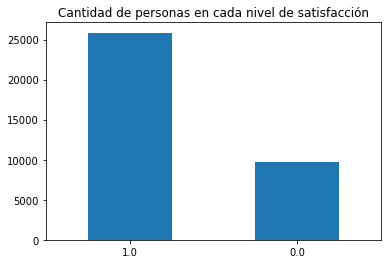

In [538]:
df['JobSat'].value_counts().plot(kind = 'bar', rot=0, title='Cantidad de personas en cada nivel de satisfacción')

### Age

In [539]:
# Age procces
df[df['Age'] > 100] = None
df[df['Age'] < 16] = None

### CompFreq

In [540]:
df['CompFreq'].value_counts()
df.dropna(subset = ["CompFreq"], inplace=True)

### ConvertedComp

In [541]:
# Esta ok hay algunos casos medio raro de 1M y 2M de USD.

### Country

In [542]:
# Que carajos hacemos aca. :)

### DevType

In [543]:
# DevType proccess.
# TOP 6 types.
# Developer, back-end
# 55.2%
# Developer, full-stack
# 54.9%
# Developer, front-end
# 37.1%
# Developer, desktop or enterprise applications
# 23.9%
# Developer, mobile
# 19.2%
# DevOps specialist
DEV_TYPES = ['Developer, back-end', 'Developer, full-stack', 'Developer, front-end',
    'Developer, desktop or enterprise applications', 'Developer, mobile', 'DevOps specialist']

for dev_type in DEV_TYPES:
    t = dev_type.replace('-', ' ').split(' ')
    t = ''.join([x.capitalize() for x in t]).replace(',', '')
    
    df['DevType' + t] = np.where(df['DevType'].str.contains(dev_type), 1, 0)

df['DevTypeOther'] = np.where(
    (df['DevTypeDeveloperBackEnd'] == 0) & (df['DevTypeDeveloperFullStack'] == 0)
    & (df['DevTypeDeveloperFrontEnd'] == 0) & (df['DevTypeDeveloperDesktopOrEnterpriseApplications'] == 0) &
    (df['DevTypeDeveloperMobile'] == 0) & (df['DevTypeDevopsSpecialist'] == 0), 
    1, 0)

df.drop('DevType', 1, inplace=True)

### EdLevel

In [544]:
def ed_level(row):
    ed_level = row["EdLevel"]
    master_level = ["Master’s degree (M.A., M.S., M.Eng., MBA, etc.)", "Other doctoral degree (Ph.D., Ed.D., etc.)"]
    university_level = ["Bachelor’s degree (B.A., B.S., B.Eng., etc.)", "Some college/university study without earning a degree", "Associate degree (A.A., A.S., etc.)", "Professional degree (JD, MD, etc.)"]
    school = ["Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)", "Primary/elementary school"]
    if isinstance(ed_level, str):
        if ed_level in master_level:
            return "Master/Doctoral"
        elif ed_level in university_level:
            return "University"
        elif ed_level in school:
            return "School"
        return "Any education"
        
df['EdLevel'] = df.apply(ed_level, axis = 1)
df.dropna(subset = ["EdLevel"], inplace=True)

In [545]:
df['EdLevel'].value_counts()

University         20902
Master/Doctoral     8649
School              1457
Any education        171
Name: EdLevel, dtype: int64

### Employment

In [546]:
df['Employment'].value_counts()

Employed full-time                                      27472
Independent contractor, freelancer, or self-employed     2767
Employed part-time                                        903
Name: Employment, dtype: int64

In [547]:
df['Employment'].value_counts()

def clasificar_employment(row):
    employment = row['Employment']
    if isinstance(employment, str):
        if employment == "Employed full-time":
            return "FullTime"
        elif employment == "Independent contractor, freelancer, or self-employed":
            return "Freelance"
        return "PartTime"

df['Employment'] = df.apply(clasificar_employment, axis = 1)

In [548]:
df = df[df['Employment'] != "Freelance"]
df.drop('Employment', 1, inplace=True)

### Gender

<AxesSubplot:title={'center':'Genero'}>

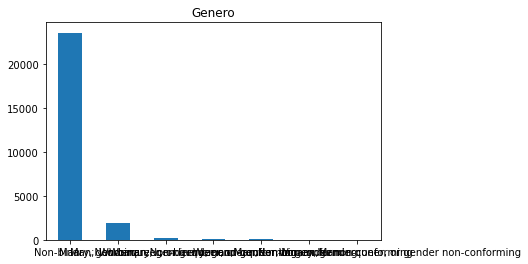

In [549]:
df['Gender'].value_counts().plot(kind = 'bar', rot=0, title='Genero')

In [550]:
df.drop('Gender', 1, inplace=True)

### JobSeek

In [551]:
df['JobSeek'].value_counts()

I’m not actively looking, but I am open to new opportunities    15852
I am not interested in new job opportunities                     8187
I am actively looking for a job                                  3365
Name: JobSeek, dtype: int64

In [552]:
def clasificar_jobseek(row):
    seek = row['JobSeek']
    if isinstance(seek, str):
        if "I’m not actively looking" in seek:
            return "No, but open to apportunities"
        elif "I am not interested in new job opportunities" in seek:
            return "No"
        return "Yes"

df['JobSeek'] = df.apply(clasificar_jobseek, axis = 1)
df['LookingForJob'] = df['JobSeek']
df.drop('JobSeek', 1, inplace=True)
df.dropna(subset = ["LookingForJob"], inplace=True)

In [553]:
df['LookingForJob'].value_counts()

No, but open to apportunities    15852
No                                8187
Yes                               3365
Name: LookingForJob, dtype: int64

### NEWOnboardGood

In [554]:
df['NEWOnboardGood'].value_counts()

Yes                             14203
No                               7903
Onboarding? What onboarding?     4995
Name: NEWOnboardGood, dtype: int64

In [555]:
df[df['NEWOnboardGood'] == "Onboarding? What onboarding?"] = None

In [556]:
df['NEWOnboardGood'].value_counts()

Yes    14203
No      7903
Name: NEWOnboardGood, dtype: int64

In [557]:
df.dropna(subset = ["NEWOnboardGood"], inplace=True)

### NEWOvertime

In [558]:
df['NEWOvertime'].value_counts()

Sometimes: 1-2 days per month but less than weekly          6019
Occasionally: 1-2 days per quarter but less than monthly    5167
Often: 1-2 days per week or more                            4846
Rarely: 1-2 days per year or less                           3567
Never                                                       2444
Name: NEWOvertime, dtype: int64

In [559]:
def clasificar_overtime(row):
    overtime = row['NEWOvertime']
    if isinstance(overtime, str):
        if "1-2 days per month but less than weekly" in overtime:
            return "Sometimes"
        elif "1-2 days per week or more" in overtime:
            return "Often"
        elif "1-2 days per quarter but less than monthly" in overtime:
            return "Occasionally"
        elif "1-2 days per year or less" in overtime:
            return "Rarely"
        return "Never"

df['NEWOvertime'] = df.apply(clasificar_overtime, axis = 1)

In [560]:
df['NEWOvertime'].value_counts()

Sometimes       6019
Occasionally    5167
Often           4846
Rarely          3567
Never           2444
Name: NEWOvertime, dtype: int64

In [561]:
df.dropna(subset = ["NEWOnboardGood"], inplace=True)

### OpSys

In [562]:
df['OpSys'].value_counts()

Windows        9332
MacOS          6795
Linux-based    5442
BSD              11
Name: OpSys, dtype: int64

In [563]:
def op_sys(row):
    op_sys = row['OpSys']
    if isinstance(op_sys, str):
        if ("Linux-based" in op_sys) or ("BSD" in op_sys):
            return "Linux"
        return op_sys

df['OpSys'] = df.apply(op_sys, axis = 1)

In [564]:
df['OpSys'].value_counts()
df.drop('OpSys', 1, inplace=True)

### OrgSize

In [565]:
df['OrgSize'].value_counts()

20 to 99 employees                                    5014
100 to 499 employees                                  4635
10,000 or more employees                              3409
1,000 to 4,999 employees                              2698
10 to 19 employees                                    1950
500 to 999 employees                                  1632
2 to 9 employees                                      1442
5,000 to 9,999 employees                               964
Just me - I am a freelancer, sole proprietor, etc.      57
Name: OrgSize, dtype: int64

In [566]:
def org_size(row):
    size = row['OrgSize']
    if isinstance(size, str):
        if "I am a freelancer" in size:
            return None
        size_range = size.replace('employees', '').replace(' to ', '-')
        size_range = size_range.split('-')
        if size_range[0] == "10,000 or more ":
            n1 = 1000000
        else:
            n1 = int(size_range[0].replace(',', ''))
            print(n1)
            
        if n1 < 100:
            return 'Small'
        elif n1 < 1000:
            return 'Medium'
        return 'Big'


df['OrgSize'] = df.apply(org_size, axis = 1)

20
20
2
100
20
500
20
20
10
500
20
500
500
1000
1000
2
10
100
10
500
100
10
20
5000
1000
2
500
20
1000
5000
20
1000
100
5000
20
2
20
100
100
10
1000
10
10
500
1000
500
20
1000
500
5000
1000
20
20
20
500
100
1000
100
100
100
1000
20
5000
500
5000
1000
1000
1000
100
1000
20
100
500
20
10
20
1000
20
20
2
100
20
100
5000
100
100
2
10
20
20
100
1000
5000
100
20
2
100
10
500
20
1000
20
20
20
100
5000
500
500
2
20
20
5000
20
500
20
500
20
1000
1000
100
100
20
100
500
5000
500
20
5000
2
1000
100
100
1000
100
20
100
20
100
1000
5000
1000
500
500
500
2
100
10
500
20
500
500
20
20
100
1000
2
5000
1000
20
20
20
100
5000
10
20
20
1000
100
20
5000
100
2
100
20
100
500
100
20
1000
100
20
20
20
1000
100
20
5000
500
20
10
20
100
5000
100
1000
20
5000
500
20
20
10
100
20
100
10
500
100
100
20
20
100
20
100
20
10
100
20
20
10
1000
10
1000
2
2
1000
20
20
20
20
5000
500
100
5000
2
10
20
500
1000
100
1000
500
20
1000
1000
20
20
1000
100
1000
10
20
100
100
2
100
20
100
2
10
20
100
20
2
100
10
100
1000
20
500

10
5000
10
100
20
20
2
20
10
5000
20
20
20
20
20
500
100
5000
2
1000
5000
10
10
20
5000
20
2
20
20
5000
2
20
1000
20
100
100
20
20
10
20
2
20
2
1000
20
100
10
20
1000
500
100
100
20
20
10
100
10
20
20
100
2
20
500
2
2
10
100
20
500
20
100
5000
20
20
500
100
100
100
1000
100
2
20
10
500
20
100
20
2
20
5000
5000
10
2
500
100
1000
10
5000
20
5000
20
20
100
20
10
20
2
2
10
1000
100
20
100
500
20
20
20
10
20
500
100
1000
20
100
20
100
500
10
10
100
20
10
10
20
10
100
100
10
20
20
20
20
2
20
20
10
20
20
20
100
20
500
2
20
500
500
20
100
10
100
2
20
100
1000
500
1000
100
100
20
10
2
5000
100
2
100
100
100
5000
10
10
20
100
100
20
1000
500
20
500
100
100
20
10
20
20
500
100
1000
10
1000
10
100
100
20
20
2
20
100
20
20
100
100
1000
10
20
100
100
20
100
20
2
1000
100
100
500
20
100
2
1000
1000
20
500
2
20
20
2
100
20
20
20
1000
1000
20
500
1000
10
500
1000
20
500
100
2
500
1000
100
20
100
1000
10
20
10
1000
500
100
10
1000
100
500
20
20
5000
2
10
2
2
500
10
20
20
5000
1000
10
1000
100
100
20
100

500
20
20
100
20
20
10
10
500
100
500
10
20
10
20
2
5000
2
5000
20
20
10
20
1000
20
500
20
20
20
100
100
100
20
100
500
10
10
2
100
1000
100
100
10
1000
20
1000
2
100
500
1000
100
20
2
1000
20
2
100
1000
20
20
10
20
10
20
20
100
1000
20
20
500
100
100
20
100
2
2
10
1000
1000
20
2
100
500
10
5000
2
100
2
20
100
100
500
100
20
2
10
100
100
10
20
20
500
100
100
1000
1000
100
100
1000
500
2
20
20
2
100
20
20
10
10
100
100
5000
20
1000
20
100
100
1000
10
20
100
100
20
20
2
500
20
1000
1000
1000
500
2
5000
100
100
100
20
20
10
20
20
20
500
1000
100
20
500
500
20
1000
20
5000
2
100
1000
10
20
2
100
100
1000
10
100
20
500
10
20
1000
10
100
10
100
2
5000
2
20
500
2
10
100
20
10
20
100
20
1000
5000
500
2
100
5000
20
20
1000
20
100
1000
100
10
1000
10
20
500
1000
20
2
100
100
100
20
20
1000
100
100
100
500
20
20
10
100
100
20
100
20
10
5000
100
5000
10
100
10
100
20
10
10
1000
20
100
100
500
100
5000
2
20
100
100
20
10
100
1000
500
1000
20
10
1000
20
1000
100
5000
100
10
100
1000
20
100
20
10
20


100
500
10
100
20
20
1000
20
2
500
20
20
5000
5000
20
20
10
100
20
10
100
100
1000
20
2
20
10
2
10
20
100
500
20
20
100
100
20
500
2
100
20
10
100
20
20
1000
100
2
10
100
500
2
10
500
500
1000
10
1000
10
20
20
5000
500
100
20
20
20
10
20
100
10
1000
500
20
100
2
500
100
500
1000
10
20
100
20
100
100
100
500
100
10
100
2
10
2
20
10
1000
1000
10
5000
100
2
100
500
500
1000
100
2
100
100
20
20
2
20
100
100
2
20
20
500
10
1000
1000
2
20
1000
500
100
5000
2
100
1000
5000
100
20
100
500
20
100
20
20
500
20
100
2
20
100
2
10
100
20
20
2
10
20
100
10
100
20
1000
1000
10
100
1000
10
500
20
20
20
100
500
20
100
1000
10
20
100
100
100
500
20
1000
100
100
100
100
20
2
20
20
20
500
100
20
100
100
5000
1000
5000
1000
100
100
10
1000
2
1000
500
500
1000
100
100
100
20
2
20
2
20
2
10
20
500
20
100
100
10
20
500
100
20
5000
20
1000
100
20
5000
1000
2
10
10
100
100
500
100
1000
1000
20
500
2
100
1000
20
500
1000
2
100
20
20
500
500
1000
100
500
100
100
10
100
20
10
100
20
20
500
1000
500
10
10
100
100
2

100
100
20
20
500
2
1000
20
100
1000
20
100
10
1000
100
100
20
20
10
1000
20
100
1000
20
10
100
20
2
20
100
100
10
20
2
5000
2
500
20
5000
100
20
10
10
100
1000
100
10
100
20
1000
10
10
100
1000
1000
500
20
500
500
20
500
100
100
1000
20
20
20
500
1000
10
10
100
20
10
100
100
5000
10
100
10
100
10
20
100
20
10
1000
5000
100
10
100
10
100
10
5000
100
100
20
20
2
20
20
100
100
20
500
100
100
2
10
20
20
20
10
20
20
20
500
100
100
20
1000
1000
20
5000
100
20
20
100
10
1000
10
20
100
10
10
20
10
20
1000
10
1000
10
10
100
20
20
20
10
500
1000
1000
10
20
20
20
1000
20
20
10
100
100
20
100
10
5000
5000
2
20
100
20
20
500
100
100
20
1000
1000
1000
2
10
20
20
2
100
100
20
100
20
100
20
100
1000
5000
20
100
1000
1000
20
10
5000
10
5000
500
20
100
5000
100
100
500
100
1000
2
2
20
100
100
20
1000
10
5000
20
20
5000
100
20
1000
20
500
100
2
1000
1000
100
500
10
1000
20
100
100
1000
100
100
20
100
20
20
100
10
2
1000
100
20
20
20
100
500
1000
20
20
1000
10
1000
5000
100
500
20
100
500
100
20
20
1000


20
100
20
20
10
20
20
20
20
500
10
100
5000
100
1000
100
100
20
100
100
10
500
100
20
10
20
1000
500
20
20
20
20
100
1000
5000
5000
1000
100
20
20
20
1000
20
10
20
100
100
10
10
1000
10
10
100
20
5000
500
100
100
10
2
2
20
2
100
500
20
100
10
100
1000
100
100
100
2
500
100
1000
500
500
100
500
1000
20
1000
1000
20
100
100
20
1000
2
10
1000
20
5000
10
2
500
500
20
100
1000
1000
20
5000
20
5000
1000
500
100
100
1000
100
500
100
100
100
20
20
1000
20
20
10
5000
10
20
20
500
20
100
2
1000
20
100
20
100
1000
100
100
2
20
20
10
500
10
10
1000
20
10
500
1000
500
1000
100
100
2
20
100
100
500
10
100
500
1000
20
1000
20
100
500
100
1000
20
5000
100
2
100
100
10
100
2
100
10
20
2
100
100
5000
2
2
500
10
10
500
20
20
20
100
2
20
20
500
20
500
5000
20
20
5000
100
5000
5000
1000
100
10
10
100
2
1000
100
500
20
20
100
20
5000
20
100
10
1000
100
1000
20
20
1000
10
2
10
20
10
20
100
20
10
20
100
20
20
100
100
20
2
100
500
100
20
500
20
100
100
100
5000
20
20
100
100
1000
20
100
20
5000
1000
500
5000
2

1000
20
1000
1000
1000
10
1000
1000
500
2
1000
20
1000
10
1000
100
100
10
20
5000
1000
100
5000
100
10
20
10
2
1000
100
2
10
20
1000
20
100
2
100
500
20
100
500
10
10
500
100
20
20
100
5000
100
10
2
10
20
20
1000
500
20
100
100
1000
20
10
20
20
100
20
20
100
20
20
20
10
1000
1000
100
1000
5000
100
1000
100
20
100
1000
100
100
1000
10
10
100
1000
5000
100
1000
20
100
2
1000
100
5000
1000
10
1000
100
100
10
10
20
100
1000
500
100
20
20
20
100
20
10
10
2
10
1000
10
2
20
10
1000
500
500
100
2
20
100
20
20
2
100
500
100
1000
20
10
100
10
20
1000
10
500
2
5000
100
1000
1000
20
100
10
20
2
100
10
20
20
100
2
20
5000
1000
100
1000
20
100
10
20
20
500
20
100
1000
20
100
100
20
20
20
10
2
20
2
20
100
100
100
20
20
10
10
2
20
500
10
20
20
5000
2
10
100
20
1000
100
20
20
20
20
100
500
20
10
500
5000
20
2
20
10
20
100
2
2
100
1000
5000
100
5000
2
20
2
100
20
100
1000
1000
100
20
10
100
10
5000
2
20
10
100
20
500
10
5000
500
5000
20
100
100
100
2
100
5000
100
100
20
2
5000
10
100
10
500
2
1000
20
10

In [567]:
df['OrgSize'].value_counts()
# df.dropna(subset = ["OrgSize"], inplace=True)

Small     8406
Big       7071
Medium    6267
Name: OrgSize, dtype: int64

### Sexuality

In [568]:
df['Sexuality'].value_counts()
df.drop('Sexuality', 1, inplace=True)

### WorkWeekHrs

In [569]:
# 16 hs * 7 days
df['WorkWeekHrs'] = df['WorkWeekHrs'].apply(lambda x: None if x >= 112 else x)

In [570]:
df['WorkWeekHrs'].value_counts()

40.0     10784
45.0      1998
50.0      1194
35.0      1069
38.0       780
         ...  
98.0         1
68.0         1
17.0         1
110.0        1
39.5         1
Name: WorkWeekHrs, Length: 113, dtype: int64

### YearsCodePro

In [571]:
# More than 50 years --> 51
df.YearsCodePro = [0.5 if x == "Less than 1 year" else 51 if x == "More than 50 years" else x for x in df.YearsCodePro]

### JobSat

In [572]:
# Country
df.dropna(subset = ["Country"], inplace=True)
TOP_COUNTRIES = df['Country'].value_counts().index[:25]
def country(row):
    country = row['Country']
    if isinstance(country, str):
        if country in TOP_COUNTRIES:
            return country
        else:
            return 'Other'

df['Country'] = df.apply(country, axis = 1)

In [573]:
# Set class as last col.
CLASS = 'JobSat'
aux = df[CLASS]
df.drop(CLASS, 1, inplace=True)
df[CLASS] = aux

In [574]:
j0 = df[df['JobSat'] == 0]
j1 = df[df['JobSat'] == 1].sample(5751)

df = pd.concat([j0, j1])

In [575]:
df.to_csv('20feb.csv', index=False)